# Python Pytorch Audio Tools Tutorial

Description: Basic examples of audio analysis and processing with simplified pytorch tools. The goal is to make this as easy for others as possible, especially those more familiar with Matlab.
 
Based partly on the following tutorials:
- [pytorch audio io tutorial](https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html)
- [pytorch resampling tutorial](https://pytorch.org/audio/stable/tutorials/audio_resampling_tutorial.html)
- [pytorch augmentation tutorial](https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html)
- [pytorch feature extraction tutorial](https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html)
- [pytorch feature augmentation tutorial](https://pytorch.org/audio/stable/tutorials/audio_feature_augmentation_tutorial.html)
- [AssemblyAI tutorial](https://github.com/AssemblyAI/youtube-tutorials/blob/main/torchaudio/torchaudio_tutorial.ipynb)

To do / consider adding:
- Cepstral Filtering (e.g., for separatation of vocal tract response and glottal excitation) or MFCCs
- Gammatone filterbank
- Non-linear filterbanks (Meddis' DNRL, Goldstein's MBPNL)
- Google's [LEAF algorithm](https://github.com/google-research/leaf-audio) , implemented in [pytorch](https://github.com/SarthakYadav/leaf-pytorch)

<a id='table_of_contents'></a>
# Table of contents 

1.0 [Audio Input](#input_sec)<br>
2.0 [Audio Analysis](#analysis_sec)<br>
3.0 [Audio Resampling](#resample_sec)<br>

# Misc. Imports

In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.0.1
2.0.2


In [2]:
import io
import os
import tarfile
import tempfile

#import boto3
import matplotlib.pyplot as plt
import requests
#from botocore import UNSIGNED
#from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset


In [3]:
#import my audio utilities plotting functions

from src_tools.audio_utilities import play_audio,plot_waveform,plot_specgram #basic audio and spectrogram tools
from src_tools.audio_utilities import plot_mel_specgram, plot_mel_specgram_vs_time, plot_mel_specgram_hz_vs_time #mel spectrogram tools
from src_tools.audio_utilities import plot_specgram_experimental #for showing 1 channel instead of both duo channels


<a id='input_sec'></a>

# 1.0 Audio Input

[back to table of contents](#table_of_contents)

## 1.1 Audio Data Path

In [4]:
#SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
#SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
#SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")
#saved to: '$HOME/.cache/torch/hub'
#then: $HOME/.cache/torch/hub/torchaudio/tutorial-assets/





In [5]:
#wind
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10501.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10502.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10503.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10504.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10505.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10506.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10507.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10508.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10509.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10510.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10511.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10512.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10513.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10514.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10515.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10516.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10517.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10518.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10519.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10520.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10521.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10522.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10523.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10524.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10525.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10526.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10527.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10528.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10529.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10530.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10531.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10532.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10533.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10534.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10535.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10536.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10537.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10538.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10539.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10540.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10541.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10542.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10543.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10544.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10545.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10546.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10547.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10548.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10549.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10550.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10501.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10502.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10503.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10504.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10505.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10506.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10507.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10508.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10509.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10510.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10511.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10512.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10513.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10514.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10515.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10516.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10517.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10518.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10519.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10520.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10521.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10522.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10523.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10524.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10525.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10526.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10527.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10528.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10529.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10530.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10531.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10532.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10533.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10534.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10535.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10536.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10537.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10538.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10539.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10540.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10541.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10542.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10543.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10544.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10545.wav" #weird clicks
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10546.wav" #weird clicks
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10547.wav" #bird + wind
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10548.wav" #bird + wind
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10549.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/5_10550.wav"


#helicopter
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10801.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10802.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10803.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10804.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10805.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10806.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10807.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10808.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10809.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10810.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10811.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10812.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10813.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10814.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10815.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10816.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10817.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10818.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10819.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10820.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10821.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10822.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10823.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10824.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10825.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10826.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10827.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10828.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10829.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10830.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10831.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10832.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10833.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10834.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10835.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10836.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10837.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10838.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10839.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10840.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10841.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10842.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10843.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10844.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10845.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10846.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10847.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10848.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10849.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10850.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10851.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10852.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10853.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10854.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10855.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10856.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10857.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10858.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10859.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10860.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10861.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10862.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10863.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10864.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10865.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10866.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10867.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10868.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10869.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10870.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10871.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10872.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10873.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10874.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/8_10875.wav"

#vehicle engine
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10901.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10902.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10903.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10904.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10905.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10906.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10907.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10908.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10909.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10910.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10911.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10912.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10913.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10914.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10915.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10916.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10917.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10918.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10919.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10920.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10921.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10922.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10923.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10924.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10925.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10926.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10927.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10928.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10929.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10930.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10931.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10932.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10933.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10934.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10935.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10936.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10937.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10938.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10939.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10940.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10941.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10942.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10943.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10944.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10945.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10946.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10947.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10948.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10949.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10950.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10951.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10952.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10953.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10954.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10955.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10956.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10957.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10958.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10959.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10960.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10961.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10962.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10963.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10964.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10965.wav" #start up brief
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10966.wav" #faint
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10967.wav" #poor but V8 steady 2-stroke
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10968.wav" #gear shift
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10969.wav" #washed out/can't hear it
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10970.wav" #washed out/can't hear it
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10971.wav" #steady V4
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10972.wav" #shutdown
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10973.wav" #rev
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10974.wav" #fan decel?
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/9_10975.wav" #rev engine up-down


#generator
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11201.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11202.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11203.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11204.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11205.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11206.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11207.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11208.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11209.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11210.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11211.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11212.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11213.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11214.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11215.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11216.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11217.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11218.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11219.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11220.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11221.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11222.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11223.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11224.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11225.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11226.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11227.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11228.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11229.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11230.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11231.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11232.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11233.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11234.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11235.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11236.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11237.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11238.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11239.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11240.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11241.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11242.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11243.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11244.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11245.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11246.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11247.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11248.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11249.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11250.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11251.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11252.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11253.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11254.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11255.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11256.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11257.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11258.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11259.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11260.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11261.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11262.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11263.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11264.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11265.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11266.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11267.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11268.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11269.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11270.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11271.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11272.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11273.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11274.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/12_11275.wav"

# gunshot
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11501.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11502.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11503.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11504.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11505.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11506.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11507.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11508.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11509.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11510.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11511.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11512.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11513.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11514.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11515.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11516.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11517.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11518.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11519.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11520.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11521.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11522.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11523.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11524.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11525.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11526.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11527.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11528.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11529.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11530.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11531.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11532.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11533.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11534.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11535.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11536.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11537.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11538.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11539.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11540.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11541.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11542.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11543.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11544.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11545.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11546.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11547.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11548.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11549.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11551.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11552.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11553.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11554.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11555.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11556.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11557.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11558.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11559.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11560.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11561.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11562.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11563.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11564.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11565.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11566.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11567.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11568.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11569.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11570.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11571.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11572.wav" #several, mid
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11573.wav" #several, far
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11574.wav" #single at start, close
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/15_11575.wav" #single at start, close

#speaking
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11801.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11802.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11803.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11804.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11805.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11806.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11807.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11808.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11809.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11810.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11811.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11812.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11813.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11814.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11815.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11816.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11817.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11818.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11819.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11820.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11821.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11822.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11823.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11824.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11825.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11826.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11827.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11828.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11829.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11830.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11831.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11832.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11833.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11834.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11835.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11836.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11837.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11838.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11839.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11840.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11841.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11842.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11843.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11844.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11845.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11846.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11847.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11848.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11849.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11850.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11851.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11852.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11853.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11854.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11855.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11856.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11857.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11858.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11859.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11860.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11861.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11862.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11863.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11864.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11865.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11866.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11867.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11868.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11869.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11870.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11871.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11872.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11873.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11874.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/18_11875.wav"


# footsteps
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11901.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11902.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11903.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11904.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11905.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11906.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11907.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11908.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11909.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11910.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11911.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11912.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11913.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11914.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11915.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11916.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11917.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11918.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11919.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11920.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11921.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11922.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11923.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11924.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11925.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11926.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11927.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11928.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11929.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11930.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11931.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11932.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11933.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11934.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11935.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11936.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11937.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11938.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11939.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11940.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11941.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11942.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11943.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11944.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11945.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11946.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11947.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11948.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11949.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11950.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11951.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11952.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11953.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11954.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11955.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11956.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11957.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11958.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11959.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11960.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11961.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11962.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11963.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11964.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11965.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11966.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11967.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11968.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11969.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11970.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11971.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11972.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11973.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11974.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/19_11975.wav"

In [6]:
# squirrel
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12701.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12702.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12703.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12704.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12705.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12706.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12707.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12708.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12709.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12710.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12711.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12712.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12713.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12714.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12715.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12716.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12717.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12718.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12719.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12720.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12721.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12722.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12723.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12724.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12725.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12726.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12727.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12728.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12729.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12730.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12731.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12732.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12733.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12734.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12735.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12736.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12737.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12738.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12739.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12740.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12741.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12742.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12743.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12744.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12745.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12746.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12747.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12748.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12749.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12750.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12751.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12752.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12753.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12754.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12755.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12756.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12757.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12758.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12759.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12760.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12761.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12762.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12763.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12764.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12765.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12766.wav" #great combo example!
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12767.wav" #bird?
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12768.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12769.wav" #bird?
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12770.wav" #bird? + squirrel
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12771.wav" #weird
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12772.wav" #nothing?
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12773.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12774.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/27_12775.wav" #squawking


# frog
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12201.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12202.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12203.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12204.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12205.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12206.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12207.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12208.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12209.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12210.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12211.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12212.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12213.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12214.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12215.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12216.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12217.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12218.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12219.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12220.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12221.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12222.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12223.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12224.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12225.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12226.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12227.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12228.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12229.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12230.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12231.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12232.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12233.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12234.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12235.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12236.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12237.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12238.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12239.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12240.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12241.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12242.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12243.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12244.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12245.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12246.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12247.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12248.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12249.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12250.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12251.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12252.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12253.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12254.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12255.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12256.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12257.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12258.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12259.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12260.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12261.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12262.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12263.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12264.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12265.wav"
SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12266.wav" #song + croak
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12267.wav" #good + interesting pulses
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12268.wav" #good
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12269.wav" #good
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12270.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12271.wav" #great
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12272.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12273.wav"
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12274.wav" #good
#SAMPLE_WAV = "/home/dm/ml_n_code/sandbox/audio/data/FSC22/waveforms/22_12275.wav" #poor quality

## 1.2 Query Metadata

In [7]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=48000, num_frames=240000, num_channels=2, bits_per_sample=16, encoding=PCM_S)


## 1.3 Load Audio Data


In [8]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

<a id='analysis_sec'></a>

# 2.0 Audio Analysis

[back to table of contents](#table_of_contents)

Basic analysis includes
- playing sound file
- plotting amplitude vs time of audio waveform
- plotting frequency vs time spectrogram of audio waveform (i.e. a short-time fourier transform with sliding window)

## 2.1 Play Audio File

In [9]:
play_audio(waveform, sample_rate) #wrapper that handles single-channel or duo-channel

## 2.2 Plot Time-Amplitude of Audio Data

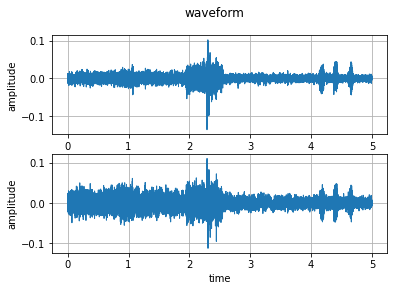

In [10]:
plot_waveform(waveform, sample_rate,title='waveform',xlabel='time',ylabel='amplitude')
#plot_waveform(waveform, sample_rate)


## 2.3 Plot Time-Frequency Spectrogram

plot_specgram_experimental(waveform, sample_rate=sample_rate, title='Spectrogram')#default: n_fft=1024, hop_length=512)
plot_specgram_experimental(waveform, sample_rate=sample_rate, title='Spectrogram 2',n_fft=2*2048, hop_length=1024)#worse time resolution, better time resolution


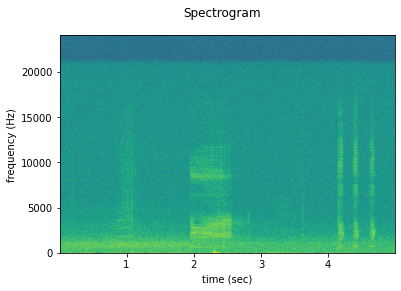

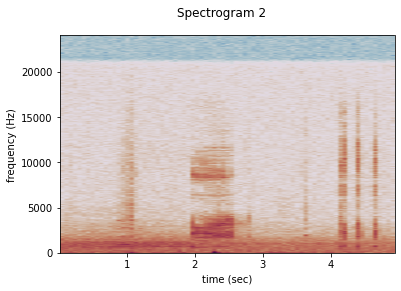

In [11]:
plot_specgram(waveform, sample_rate=sample_rate, title='Spectrogram',max_channels_show=1)#default: n_fft=1024, hop_length=512)
#plot_specgram(waveform, sample_rate=sample_rate, title='Spectrogram 2',n_fft=256, hop_length=128)#worse frequency resolution, better time resolution
plot_specgram(waveform, sample_rate=sample_rate, title='Spectrogram 2',n_fft=2*2048, hop_length=1024,
              max_channels_show=1,cmap='twilight_shifted')#worse time resolution, better time resolution



## 2.4 Plot Mel-Spectrogram

#plot mel spectrogram, mel-frequency bin vs spectrogram frame
plot_mel_specgram(waveform, sample_rate,title='Mel Spectrogram')#default: n_fft=1024, hop_length=512)

#plot mel spectrogram, mel filter center-frequency (in Hz) vs time (in seconds)
plot_mel_specgram_hz_vs_time(waveform, sample_rate=sample_rate, secs_label_separation=.5, smallest_freq=250)


<a id='resample_sec'></a>

# 3.0 Downsample to 16kHz (8kHz Nyquist)

[back to table of contents](#table_of_contents)


AST code to convert:
    
# convert the audio to 16kHz
    base_dir = './data/ESC-50-master/'
    os.mkdir('./data/ESC-50-master/audio_16k/')
    audio_list = get_immediate_files('./data/ESC-50-master/audio')
    for audio in audio_list:
        print('sox ' + base_dir + '/audio/' + audio + ' -r 16000 ' + base_dir + '/audio_16k/' + audio)
        os.system('sox ' + base_dir + '/audio/' + audio + ' -r 16000 ' + base_dir + '/audio_16k/' + audio)

## 4.1 Downsampling

Downsample an audio waveform from one frequency to a lower one. We (usually) need to lowpass filter here to 
avoid aliasing. Default is to use Hann window filter (sinc_interp_hann) 

In [12]:
import torchaudio.transforms as T
import torchaudio.functional as F

### Waveform and (re)sample rates

In [13]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

resample_rate = 16000
#resample_rate = 24000
#resample_rate = 4000
#resample_rate = 1000
#resample_rate = 500


print(f"sample_rate: {sample_rate}, resample_rate: {resample_rate}")

sample_rate: 48000, resample_rate: 16000


### Filter and Downsample

<br>

<ins>Parameters:</ins>
- **Lowpass filter width**: 
   Larger lowpass_filter_width --> sharper, more precise filter, but more computationally expensive.
- **Rolloff**:
   Lower rolloff value --> more attenuation (& thus reduced aliasing) near Nyquist. This will also reduce higher frequencies we may want to keep so beware.
- **Window filter function**:
   - default is Hann, which is a weighted cosine function. 
   - Kaiser is better. This is a near optimal window function that contains an additional ``beta`` parameter that allows for the design of the smoothness of the filter and width of impulse. This can be controlled using the ``resampling_method`` parameter.
   - Blackman or Parks-McClellan is more precise but can be overkill (to do)
   
   

In [14]:
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=12, 
                                rolloff=0.90, resampling_method="sinc_interp_kaiser")



### Check Results

In [15]:
#check audio -- downsampled version should have less higher frequency content
play_audio(waveform, sample_rate)
play_audio(resampled_waveform, resample_rate)#should have less high freq content than previous, & sound like below


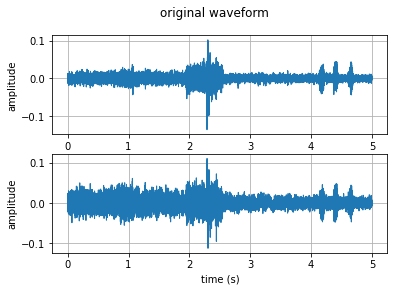

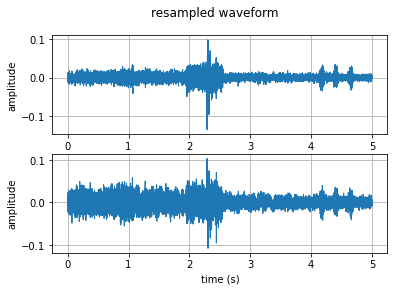

In [16]:
# check waveforms -- may look similar (just less points that can't easily be seen) or may look slightly smoother
plot_waveform(waveform, sample_rate,title='original waveform',xlabel='time (s)',ylabel='amplitude')
plot_waveform(resampled_waveform, resample_rate,title='resampled waveform',xlabel='time (s)',ylabel='amplitude')



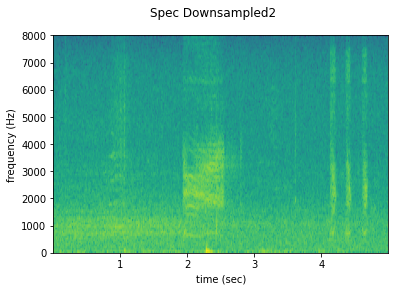

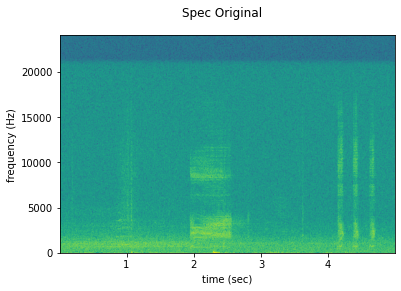

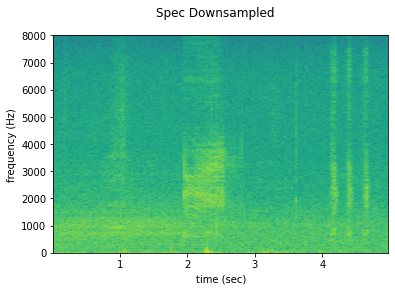

sample_rate: 48000, resample_rate: 16000


In [17]:
# check spectrograms -- everything below original Nyquist frequencey * 0.5( = 4kHz) should be similar 
# if aliasing is present, it won't look the same


NS=1
plot_specgram(resampled_waveform, resample_rate, title='Spec Downsampled2 ', 
              n_fft=256*NS, hop_length=128*NS,max_channels_show=1)

plot_specgram(waveform, sample_rate, title='Spec Original',max_channels_show=1)
plot_specgram(resampled_waveform, resample_rate, title='Spec Downsampled',max_channels_show=1)



print(f"sample_rate: {sample_rate}, resample_rate: {resample_rate}")

/home/dm/miniconda3/envs/torchaudio/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(
/home/dm/ml_n_code/git repos/torchaudio_basics/src_tools/audio_utilities.py:635: RuntimeWarning: divide by zero encountered in log10
  melspec_dB = 10*np.log10(melspec[0]) #make into dB: 10*log10 of PSD, since PSD is power


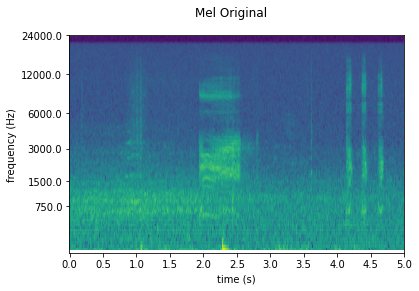

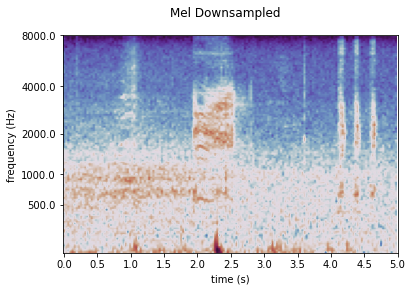

In [18]:
#plot mel spectrogram, mel filter center-frequency (in Hz) vs time (in seconds)
plot_mel_specgram_hz_vs_time(waveform, sample_rate=sample_rate,title='Mel Original')
#plot mel spectrogram, mel filter center-frequency (in Hz) vs time (in seconds)
plot_mel_specgram_hz_vs_time(resampled_waveform, sample_rate=resample_rate, title='Mel Downsampled',cmap='twilight_shifted')




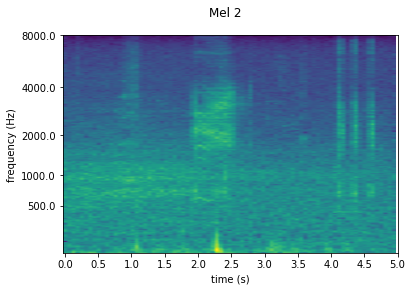

In [19]:
plot_mel_specgram_hz_vs_time(resampled_waveform, sample_rate=resample_rate, title='Mel 2',
                             n_mels=256, n_fft=2048, hop_length=1024)
#default: n_mels=128, n_fft=1024, hop_length=512)

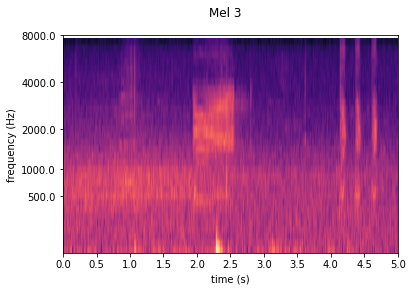

In [20]:
plot_mel_specgram_hz_vs_time(resampled_waveform, sample_rate=resample_rate, title='Mel 3',
                             n_mels=32, n_fft=256, hop_length=128,cmap='magma')
#default: n_mels=128, n_fft=1024, hop_length=512)